In [1]:
import numpy as np
from tensorflow import keras
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-11 19:28:56.991515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 19:28:56.991691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 19:28:57.158944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32 , input_shape =(150, 150 ,3) , kernel_size = (3 , 3) , activation = "relu"),
    keras.layers.MaxPooling2D((2 , 2)),

    keras.layers.Conv2D(filters = 64 , input_shape =(150 , 150 ,3) , kernel_size = (3 , 3) , activation = "relu"),
    keras.layers.MaxPooling2D((2 , 2)),

    keras.layers.Conv2D(filters = 128 , input_shape =(150 , 150 ,3) , kernel_size = (3 , 3) , activation = "relu"),
    keras.layers.MaxPooling2D((2 , 2)),


    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dense(164 , activation = "relu"),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(2 , activation = "softmax"),
    
    
])  

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [7]:
cat_pic = []
cat_label = []
cat_dir = r"/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
for cat in os.listdir(cat_dir)[:2001]:
    img_path = os.path.join(cat_dir, cat)
    img = cv2.imread(img_path)
    if img is not None: 
        img = cv2.resize(img ,(150,150))
        cat_pic.append(img)
        cat_label.append([0])

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


In [8]:
cat_pic_train = np.array(cat_pic)
cat_label_train = np.array(cat_label)
print(cat_pic_train.shape)
print(len(cat_label_train))

(1998, 150, 150, 3)
1998


(-0.5, 149.5, 149.5, -0.5)

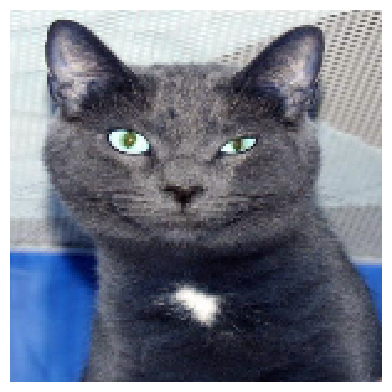

In [9]:
plt.matshow(cat_pic_train[1])
plt.axis("off")

In [10]:
cat_pic = []
cat_label = []

for cat in os.listdir(cat_dir)[3000:4001]:
    img_path = os.path.join(cat_dir, cat)
    img = cv2.imread(img_path)
    if img is not None: 
        img = cv2.resize(img ,(150,150))
        cat_pic.append(img)
        cat_label.append([0])

cat_pic_test = np.array(cat_pic)
cat_label_test = np.array(cat_label)

(-0.5, 149.5, 149.5, -0.5)

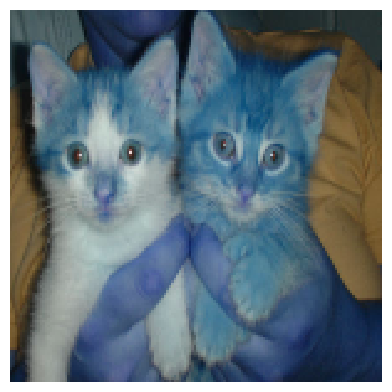

In [11]:
plt.matshow(cat_pic_test[1])
plt.axis("off")

In [12]:
dog_pic = []
dog_label = []
dog_dir = r"/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"
for dog in os.listdir(dog_dir)[:2001]:
    img_path = os.path.join(dog_dir, dog)
    img = cv2.imread(img_path)
    if img is not None: 
        img = cv2.resize(img ,(150,150))
        dog_pic.append(img)
        dog_label.append([1])

dog_pic_train = np.array(dog_pic)
dog_label_train = np.array(dog_label)

Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


(-0.5, 149.5, 149.5, -0.5)

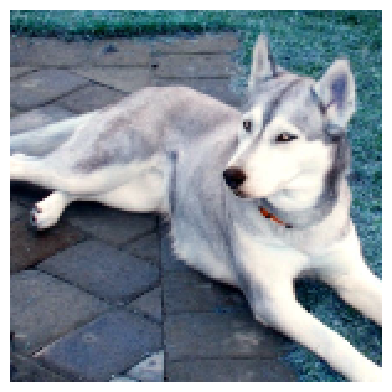

In [13]:
plt.matshow(dog_pic_train[1])
plt.axis("off")

In [14]:
dog_pic = []
dog_label = []
for dog in os.listdir(dog_dir)[3000:4001]:
    img_path = os.path.join(dog_dir, dog)
    img = cv2.imread(img_path)
    if img is not None: 
        img = cv2.resize(img ,(150,150))
        dog_pic.append(img)
        dog_label.append([1])

dog_pic_test = np.array(dog_pic)
dog_label_test = np.array(dog_label)

(-0.5, 149.5, 149.5, -0.5)

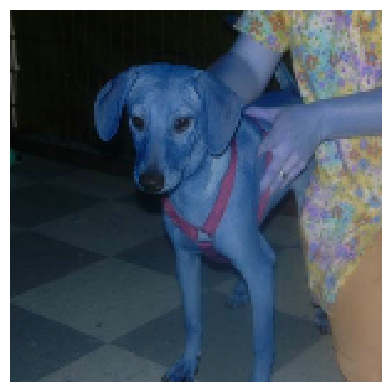

In [15]:
plt.matshow(dog_pic_test[1])
plt.axis("off")

In [16]:
def shuffle_data(array11, array12, array21, array22):
     
    images = np.concatenate((array11, array12), axis=0)
    labels = np.concatenate((array21, array22), axis=0)
    
     
    indices = np.random.permutation(len(images))
    shuffled_images = images[indices]
    shuffled_labels = labels[indices]
    
    return shuffled_images, shuffled_labels

In [17]:
x_train ,y_train = shuffle_data(cat_pic_train , dog_pic_train , cat_label_train , dog_label_train)
x_test ,y_test = shuffle_data(cat_pic_test , dog_pic_test , cat_label_test , dog_label_test)

In [18]:
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

In [19]:
model.fit(x_train_normalized , y_train , epochs = 15)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 94s 733ms/step - accuracy: 0.5471 - loss: 0.7094
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 727ms/step - accuracy: 0.6827 - loss: 0.6115
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 89s 710ms/step - accuracy: 0.7186 - loss: 0.5342
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 716ms/step - accuracy: 0.7697 - loss: 0.4768
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 89s 711ms/step - accuracy: 0.8239 - loss: 0.3936
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 89s 713ms/step - accuracy: 0.8582 - loss: 0.3177
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 716ms/step - accuracy: 0.9011 - loss: 0.2513
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 141s 710ms/step - accuracy: 0.9484 - loss: 0.1279
Epoch 9/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 719ms/step - accuracy: 0.9694 - loss: 0.0807
Epoch 10/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 92s 735ms/step - accuracy: 0.9850 - loss: 0.0487
Epoch 11/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 90s 717ms/step - accuracy: 0.9851 - loss: 0.0439
Epoch 12/15
125/12

In [20]:
the_animal_is = ["Cat" , "Dog"]

y_pred = model.predict(x_test_normalized)

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step


enter an index ;  87


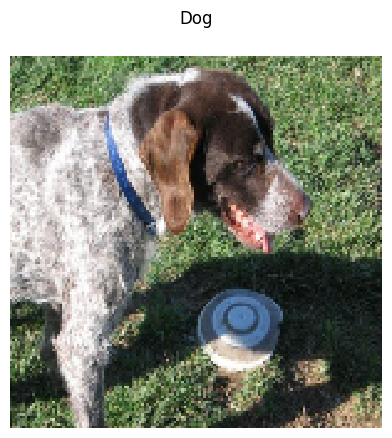

In [34]:
index = int(input("enter an index ; "))
plt.matshow(cv2.cvtColor(x_test[index], cv2.COLOR_BGR2RGB))


plt.title(the_animal_is[np.argmax(y_pred[index])])
plt.axis('off')
plt.show()